In [1]:
from itertools import combinations
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from tqdm import tqdm
import pandas as pd
import numpy as np
from pullData import pull_data

In [2]:
df = pull_data()
display(df.head())
print(df.shape)

product_group_name      price   age  solid_pattern  allover_pattern  \
0  Garment Lower body  15.246610  30.0            1.0              0.0   
1      Socks & Tights   6.094068  30.0            1.0              0.0   
2           Underwear  11.433051  30.0            1.0              0.0   
3         Accessories   7.619492  30.0            1.0              0.0   
4  Garment Upper body   9.907627  30.0            0.0              0.0   

   denim_pattern  melange_pattern  stripe_pattern  black_colour  white_colour  \
0            0.0              0.0             0.0           1.0           0.0   
1            0.0              0.0             0.0           0.0           1.0   
2            0.0              0.0             0.0           1.0           0.0   
3            0.0              0.0             0.0           0.0           0.0   
4            0.0              0.0             1.0           0.0           1.0   

   ...  Oct  Nov  Dec  Trousers  Trousers Denim  Shorts  Jersey Fancy  Skirts  \
0  ...  0.0  0.0  0.0       1.0             0.0     0.0           0.0     0.0   
1  ...  0.0  1.0  0.0       0.0             0.0     0.0           0.0     0.0   
2  ...  0.0  0.0  0.0       0.0             0.0     0.0           0.0     0.0   
3  ...  0.0  0.0  0.0       0.0             0.0     0.0           0.0     0.0   
4  ...  0.0  0.0  0.0       0.0             0.0     0.0           0.0     0.0   

   Jersey Basic                                        customer_id  
0           0.0  3681748607f3287d2c3a65e00bb5fb153de30e9becf158...  
1           0.0  3681748607f3287d2c3a65e00bb5fb153de30e9becf158...  
2           0.0  3681748607f3287d2c3a65e00bb5fb153de30e9becf158...  
3           0.0  3681748607f3287d2c3a65e00bb5fb153de30e9becf158...  
4           1.0  3681748607f3287d2c3a65e00bb5fb153de30e9becf158...  

[5 rows x 37 columns]

(6863592, 37)


In [3]:
df.columns

Index(['product_group_name', 'price', 'age', 'solid_pattern',
       'allover_pattern', 'denim_pattern', 'melange_pattern', 'stripe_pattern',
       'black_colour', 'white_colour', 'darkblue_colour', 'lightbeige_colour',
       'blue_colour', 'club_member_status', 'fashion_news_frequency',
       'Divided', 'Menswear', 'Baby_Children', 'Sport', 'Feb', 'Mar', 'Apr',
       'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Trousers',
       'Trousers Denim', 'Shorts', 'Jersey Fancy', 'Skirts', 'Jersey Basic',
       'customer_id'],
      dtype='object')

## Cluster Analysis

In [4]:
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.preprocessing import MinMaxScaler

customer_df = df.groupby('customer_id').agg({
    'price': 'sum',
    'product_group_name': 'count',
    'age': lambda x: x.value_counts().index[0],
    'Feb': 'mean'
})

customer_df = pd.DataFrame(data={
    'customer_id': customer_df.index,
    'Revenue': customer_df.price.values,
    'Total Items': customer_df.product_group_name.values,
    'Age': customer_df.age.values,
    'Feb': customer_df.Feb.values
})

customer_df

customer_id      Revenue  \
0       00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...    65.753390   
1       00007d2de826758b65a93dd24ce629ed66842531df6699...  1384.741525   
2       00009d946eec3ea54add5ba56d5210ea898def4b46c685...   883.060169   
3       0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...    21.950847   
4       0000b2f1829e23b24feec422ef13df3ccedaedc85368e6...   211.194915   
...                                                   ...          ...   
352461  fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...   224.557627   
352462  ffff61677073258d461e043cc9ed4ed97be5617a920640...   179.893220   
352463  ffff64f7850d4268016db8db3d48bf5433db2a926ba71b...   350.458475   
352464  ffff7d65748db4d52e48b74c8f83ccb0029fc3bbafa511...    29.730508   
352465  ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...   167.537288   

        Total Items   Age       Feb  
0                 4  52.0  0.000000  
1                78  32.0  0.000000  
2                62  56.0  0.177419  
3                 2  29.0  0.000000  
4                20  54.0  0.000000  
...             ...   ...       ...  
352461            5  29.0  0.000000  
352462           14  32.0  0.142857  
352463           21  32.0  0.000000  
352464            2  20.0  0.000000  
352465           24  21.0  0.000000  

[352466 rows x 5 columns]

In [19]:
from scipy.stats import boxcox
transformed_data, best_lambda = boxcox(customer_df.Age)
transformed_data

array([2.76326337, 2.5260681 , 2.79755082, ..., 2.5260681 , 2.27424329,
       2.3014614 ])

In [6]:
# find optimal number of clusters
n_clusters = [2,3,4,5,6,7,8]
sse = dict()

# min/max scale our aggregate data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(customer_df[['Revenue', 'Age']])

# run Kmeans algo
for n in tqdm(n_clusters):
    cluster_model = KMeans(n_clusters=n)
    cluster_model.fit(scaled_data)
    sse[n] = cluster_model.inertia_

100%|██████████| 7/7 [00:16<00:00,  2.40s/it]


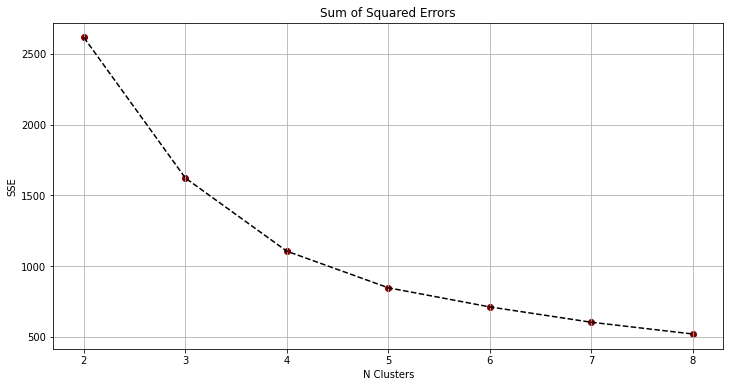

In [7]:
plt.figure(figsize=(12,6))
plt.plot(n_clusters, sse.values(), ls='--', color='black')
plt.scatter(n_clusters, sse.values(), color='maroon', lw=1)
plt.title('Sum of Squared Errors')
plt.ylabel('SSE')
plt.xlabel('N Clusters')
plt.grid()

In [8]:
cluster_model = KMeans(n_clusters=4, random_state=627)
cluster_model.fit(scaled_data)

customer_df['Cluster'] = cluster_model.labels_
customer_df.head()

customer_id      Revenue  \
0  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...    65.753390   
1  00007d2de826758b65a93dd24ce629ed66842531df6699...  1384.741525   
2  00009d946eec3ea54add5ba56d5210ea898def4b46c685...   883.060169   
3  0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...    21.950847   
4  0000b2f1829e23b24feec422ef13df3ccedaedc85368e6...   211.194915   

   Total Items   Age       Feb  Cluster  
0            4  52.0  0.000000        3  
1           78  32.0  0.000000        0  
2           62  56.0  0.177419        2  
3            2  29.0  0.000000        0  
4           20  54.0  0.000000        3

In [9]:
customer_df.groupby('Cluster').mean()

Revenue  Total Items        Age       Feb
Cluster                                              
0        301.582034    24.128645  33.701618  0.089173
1        210.115401    17.763191  23.104867  0.075455
2        210.348733    15.645713  62.130910  0.083425
3        258.903200    20.409381  49.154956  0.082204

In [10]:
customer_df.groupby('Cluster').std()

Revenue  Total Items       Age       Feb
Cluster                                             
0        473.664956    34.260472  3.805703  0.220614
1        310.249285    23.696825  2.824603  0.196171
2        357.644225    24.252952  5.638258  0.213762
3        418.363221    29.398954  3.778678  0.209211

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = customer_df.loc[customer_df['Cluster']==2].Age.values.reshape(-1,1)
y = customer_df.loc[customer_df['Cluster']==2].Revenue

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(poly_features, y)


LinearRegression()

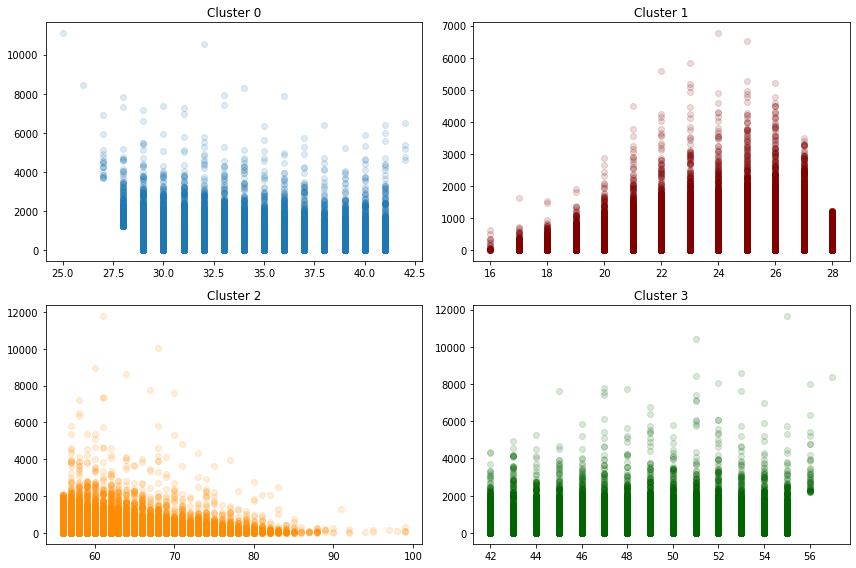

In [132]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].scatter(customer_df.loc[customer_df['Cluster']==0]['Age'], customer_df.loc[customer_df['Cluster']==0]['Revenue'], alpha=0.15)
axes[0,1].scatter(customer_df.loc[customer_df['Cluster']==1]['Age'], customer_df.loc[customer_df['Cluster']==1]['Revenue'], alpha=0.15, color='maroon')
axes[1,0].scatter(customer_df.loc[customer_df['Cluster']==2]['Age'], customer_df.loc[customer_df['Cluster']==2]['Revenue'], alpha=0.15, color='darkorange')
axes[1,1].scatter(customer_df.loc[customer_df['Cluster']==3]['Age'], customer_df.loc[customer_df['Cluster']==3]['Revenue'], alpha=0.15, color='darkgreen')

axes[0, 0].set_title('Cluster 0')
axes[0, 1].set_title('Cluster 1')
axes[1, 0].set_title('Cluster 2')
axes[1, 1].set_title('Cluster 3')

plt.tight_layout()

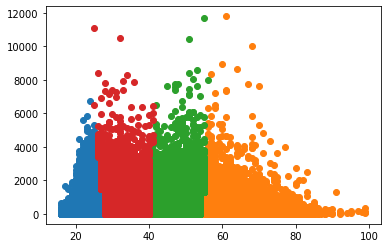

In [44]:
plt.scatter(customer_df.loc[customer_df['Cluster']==0].Age, customer_df.loc[customer_df['Cluster']==0].Revenue)
plt.scatter(customer_df.loc[customer_df['Cluster']==1].Age, customer_df.loc[customer_df['Cluster']==1].Revenue)
plt.scatter(customer_df.loc[customer_df['Cluster']==2].Age, customer_df.loc[customer_df['Cluster']==2].Revenue)
plt.scatter(customer_df.loc[customer_df['Cluster']==3].Age, customer_df.loc[customer_df['Cluster']==3].Revenue)

- Predictive Modeling: Use machine learning algorithms to predict future behavior of customers within each cluster. build predictive models to forecast future purchases, estimate customer lifetime value

     - Other Predictive Modeling: predicting customer behavior or outcomes; could experiment with different models, including linear regression, decision trees, random forests, or gradient boosting.
----------------

- Churn Prediction: Build models to predict customer churn within each cluster. Identify factors that contribute to churn and develop strategies to retain at-risk customers.

-----------------


- Dynamic Pricing Models: Explore dynamic pricing models tailored to the characteristics of each cluster. we can consider factors such as demand elasticity and price sensitivity within each segment.





<AxesSubplot:xlabel='Revenue', ylabel='Density'>

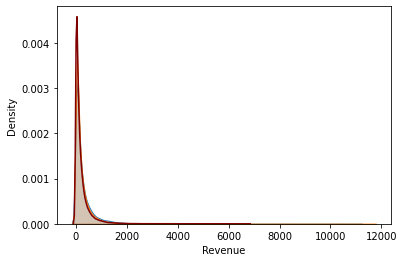

In [61]:
sns.kdeplot(customer_df.loc[customer_df['Cluster']==0].Revenue, shade=True)
sns.kdeplot(customer_df.loc[customer_df['Cluster']==3].Revenue, shade=True)
sns.kdeplot(customer_df.loc[customer_df['Cluster']==1].Revenue, shade=False, color='maroon')

In [11]:
customer_df.corr()

Revenue  Total Items       Age       Feb   Cluster
Revenue      1.000000     0.945816  0.017850 -0.035656 -0.018852
Total Items  0.945816     1.000000 -0.007401 -0.039351 -0.033432
Age          0.017850    -0.007401  1.000000  0.013904  0.638601
Feb         -0.035656    -0.039351  0.013904  1.000000 -0.003572
Cluster     -0.018852    -0.033432  0.638601 -0.003572  1.000000

# FEAUTRE SELECTION

## Random Forest

In [11]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

df = df.merge(customer_df[['customer_id', 'Cluster']], left_on='customer_id', right_on='customer_id')
endcoded_variable = pd.DataFrame(ohe.fit_transform(df[['Cluster']]),columns=ohe.categories_[0])
df = pd.concat([df.drop(columns=['Cluster'],axis=1), endcoded_variable[[1, 2, 3]]],axis=1) # establish 0 as control group
display(df.head())
print(df.shape)

product_group_name      price   age  solid_pattern  allover_pattern  \
0  Garment Lower body  15.246610  30.0            1.0              0.0   
1      Socks & Tights   6.094068  30.0            1.0              0.0   
2           Underwear  11.433051  30.0            1.0              0.0   
3         Accessories   7.619492  30.0            1.0              0.0   
4  Garment Upper body   9.907627  30.0            0.0              0.0   

   denim_pattern  melange_pattern  stripe_pattern  black_colour  white_colour  \
0            0.0              0.0             0.0           1.0           0.0   
1            0.0              0.0             0.0           0.0           1.0   
2            0.0              0.0             0.0           1.0           0.0   
3            0.0              0.0             0.0           0.0           0.0   
4            0.0              0.0             1.0           0.0           1.0   

   ...  Trousers  Trousers Denim  Shorts  Jersey Fancy  Skirts  Jersey Basic  \
0  ...       1.0             0.0     0.0           0.0     0.0           0.0   
1  ...       0.0             0.0     0.0           0.0     0.0           0.0   
2  ...       0.0             0.0     0.0           0.0     0.0           0.0   
3  ...       0.0             0.0     0.0           0.0     0.0           0.0   
4  ...       0.0             0.0     0.0           0.0     0.0           1.0   

                                         customer_id    1    2    3  
0  3681748607f3287d2c3a65e00bb5fb153de30e9becf158...  0.0  0.0  0.0  
1  3681748607f3287d2c3a65e00bb5fb153de30e9becf158...  0.0  0.0  0.0  
2  3681748607f3287d2c3a65e00bb5fb153de30e9becf158...  0.0  0.0  0.0  
3  3681748607f3287d2c3a65e00bb5fb153de30e9becf158...  0.0  0.0  0.0  
4  3681748607f3287d2c3a65e00bb5fb153de30e9becf158...  0.0  0.0  0.0  

[5 rows x 40 columns]

(6863592, 40)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

PRODUCT_GROUP_NAME = 'Garment Lower body'
SAMPLE_SIZE = 100000
SIMULATIONS = 50

baruta_df = pd.DataFrame(index=df.drop(columns=['product_group_name', 'customer_id']).columns)

for _ in tqdm(range(SIMULATIONS)):
    # define our sample targets for 50/50 split
    target_samples = df.loc[df['product_group_name']==PRODUCT_GROUP_NAME].sample(n=int(SAMPLE_SIZE/2)).reset_index(drop=True)
    other_samples = df.loc[df['product_group_name']!=PRODUCT_GROUP_NAME].sample(n=len(target_samples)).reset_index(drop=True)

    # concat data
    sample_df = pd.concat([target_samples, other_samples])
    sample_df[PRODUCT_GROUP_NAME] = sample_df['product_group_name'].apply(lambda x: 1 if x==PRODUCT_GROUP_NAME else 0)
    sample_df = sample_df.sample(frac=1).reset_index(drop=True)
    sample_df.drop(columns=['product_group_name', 'customer_id'], inplace=True)

    X, y = sample_df.drop(columns=[PRODUCT_GROUP_NAME]), sample_df[PRODUCT_GROUP_NAME]

    # scale our data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # model data to run baruta algo
    rf = RandomForestClassifier()
    rf.fit(X=X_scaled, y=y)

    baruta_df[_] = rf.feature_importances_

100%|██████████| 50/50 [08:49<00:00, 10.58s/it]


In [25]:
baruta_df.T.mean().sort_values(ascending=False).head(11)

Trousers          0.295548
price             0.116642
Shorts            0.090580
Skirts            0.079134
age               0.070898
denim_pattern     0.070855
Trousers Denim    0.062960
Sport             0.026600
Jersey Basic      0.022528
Jersey Fancy      0.019675
Divided           0.014243
dtype: float64

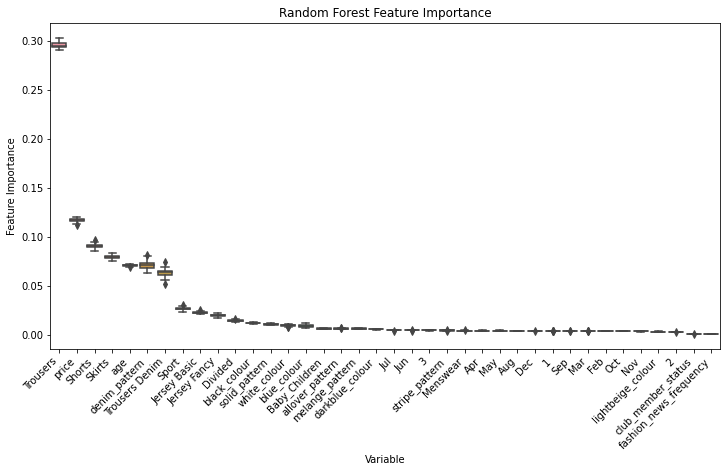

In [13]:
mean_by_importance = list(baruta_df.T.mean().sort_values(ascending=False).index)
plt.figure(figsize=(12, 6))
sns.boxplot(data=baruta_df.T, order=mean_by_importance)
plt.title('Random Forest Feature Importance')
plt.xlabel('Variable')
plt.ylabel('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

In [32]:
y.unique()

array([0, 1], dtype=int64)

In [37]:
y.astype(str)

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    1
99997    0
99998    1
99999    0
Name: Garment Lower body, Length: 100000, dtype: object

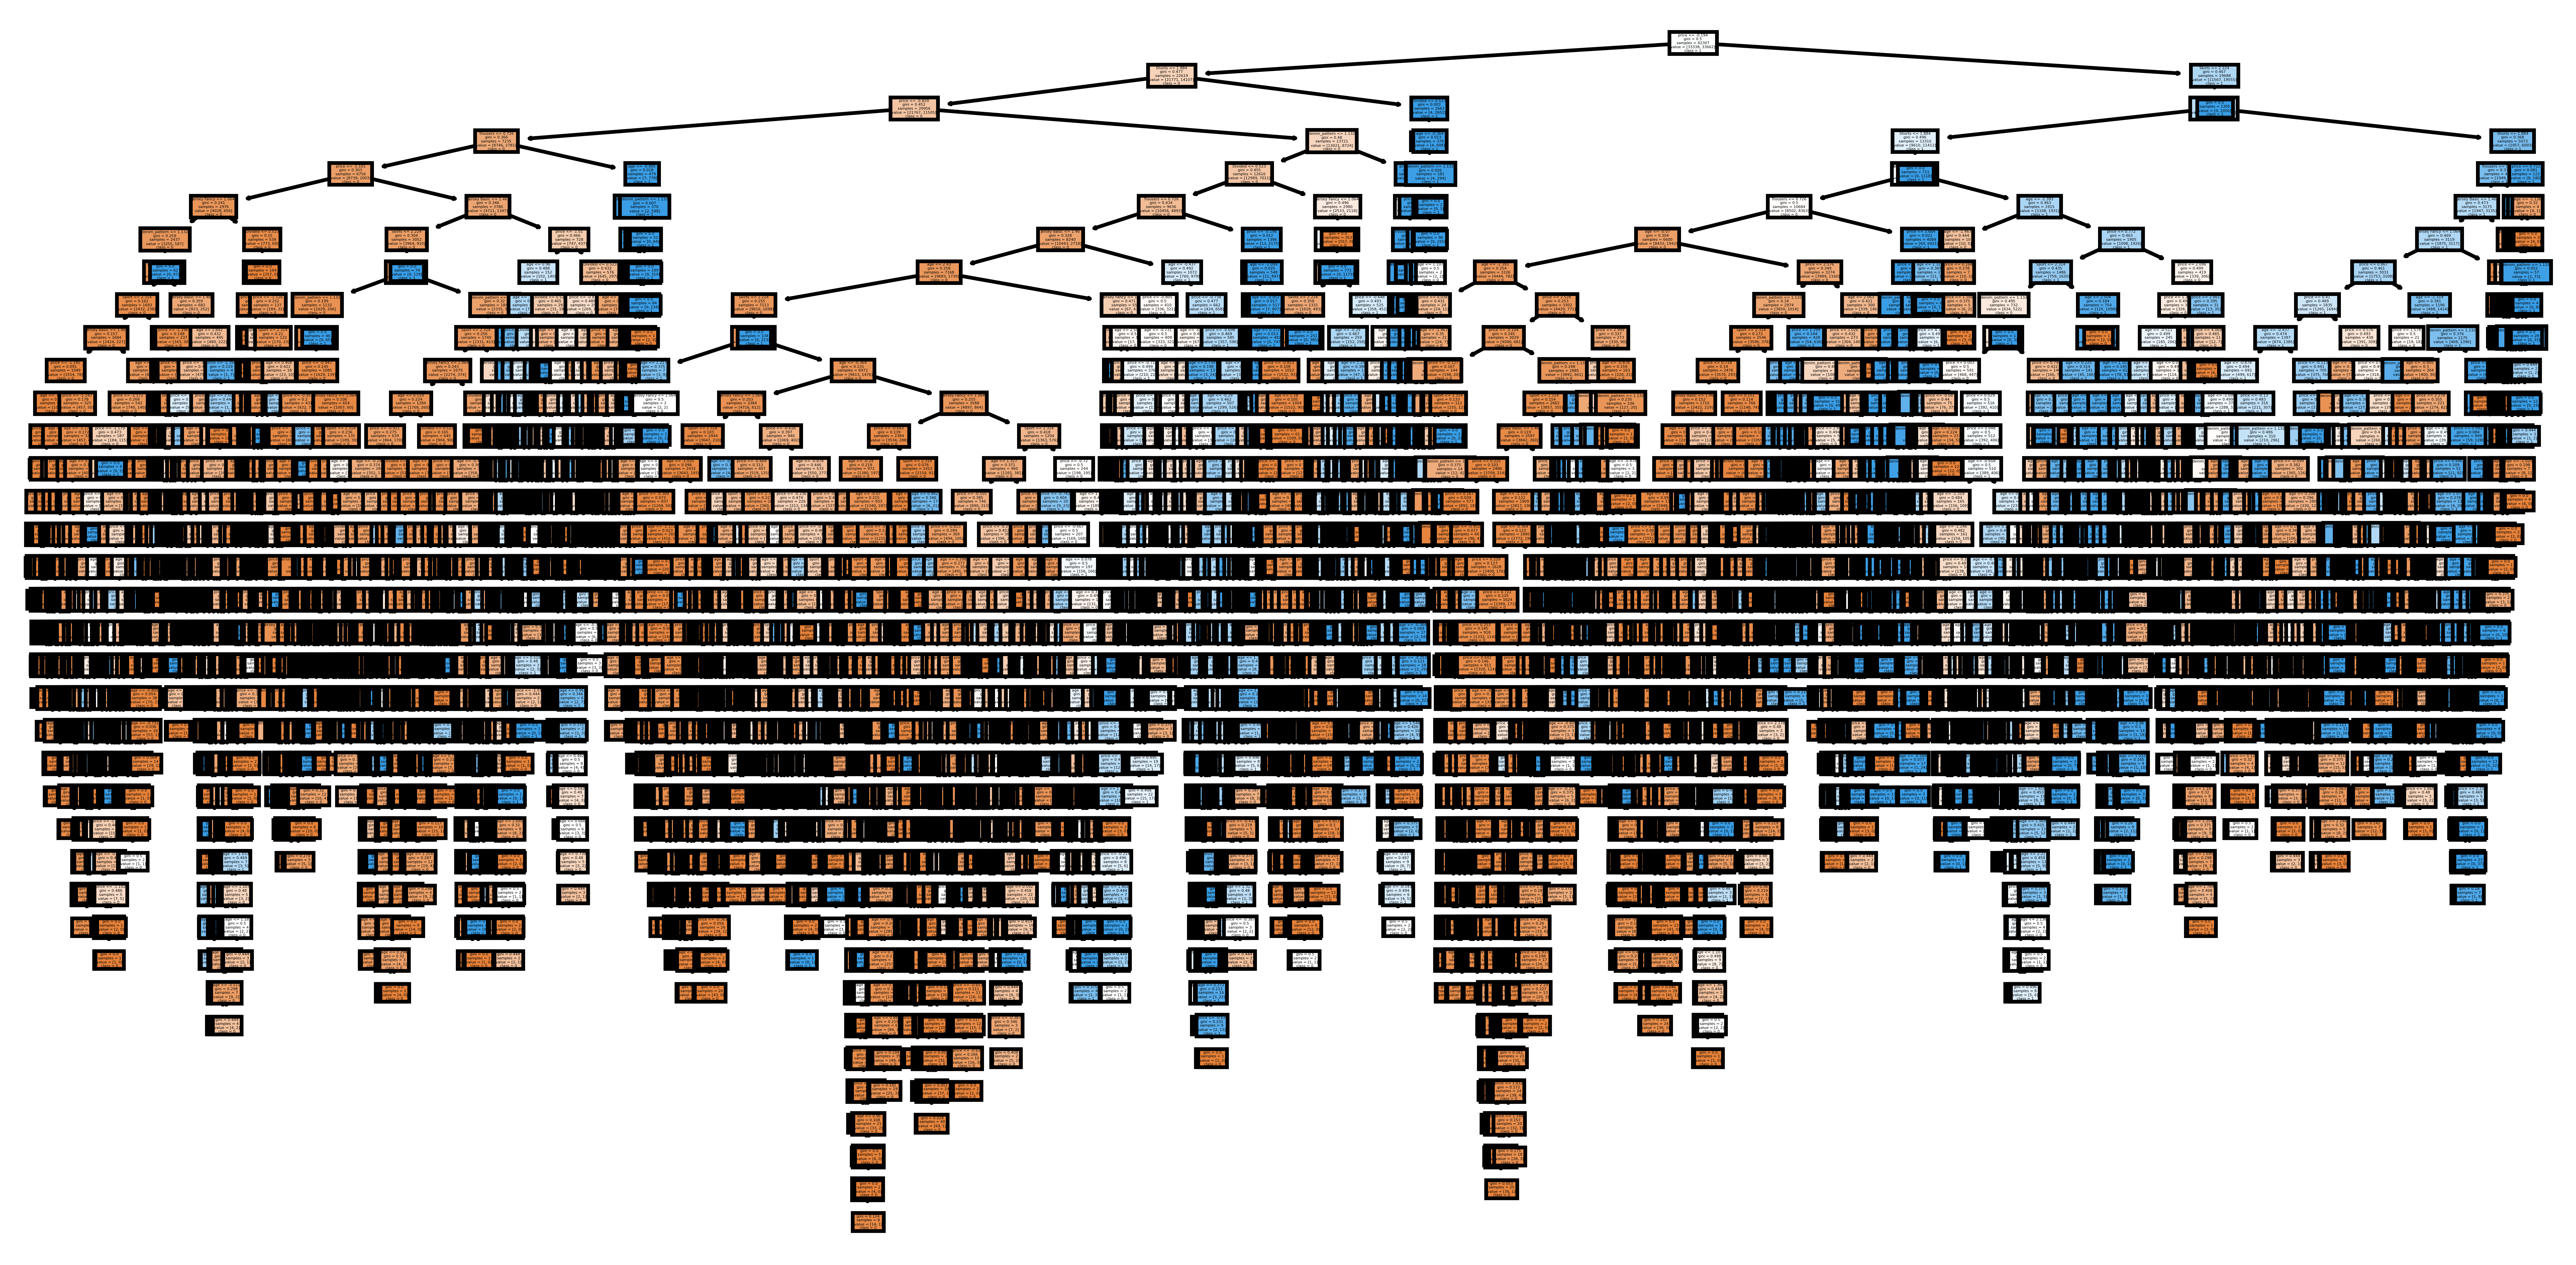

In [49]:
from sklearn import tree
fn=X.columns
cn=y.astype(str).unique()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,6), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [48]:
rf.feature_importances_

array([0.3307842 , 0.15300212, 0.10620651, 0.09418968, 0.07396072,
       0.15684514, 0.03120689, 0.02161675, 0.01696248, 0.01522551])

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, r2_score, precision_score, roc_auc_score, roc_curve
IMPORTANT_FEATURES = ['Trousers', 'price', 'Shorts', 'Skirts', 'age', 'denim_pattern', 'Sport', 'Jersey Basic', 'Jersey Fancy', 'Divided']
rf = RandomForestRegressor()

# define our sample targets for 50/50 split
target_samples = df.loc[df['product_group_name']==PRODUCT_GROUP_NAME].sample(n=int(SAMPLE_SIZE/2)).reset_index(drop=True)
other_samples = df.loc[df['product_group_name']!=PRODUCT_GROUP_NAME].sample(n=len(target_samples)).reset_index(drop=True)

# concat data
sample_df = pd.concat([target_samples, other_samples])
sample_df[PRODUCT_GROUP_NAME] = sample_df['product_group_name'].apply(lambda x: 1 if x==PRODUCT_GROUP_NAME else 0)
sample_df = sample_df.sample(frac=1).reset_index(drop=True)
sample_df.drop(columns=['product_group_name', 'customer_id'], inplace=True)

X, y = sample_df.drop(columns=[PRODUCT_GROUP_NAME])[IMPORTANT_FEATURES], sample_df[PRODUCT_GROUP_NAME]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)

# scale our data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

rf.fit(X=train_scaled, y=y_train)

RandomForestRegressor()

In [30]:
import sklearn
dot_data = sklearn.tree.export_graphviz(rf, out_file=None,
                                       feature_names = X_train.columns,
                                       filled = True)

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

In [52]:
np.round(rf.predict(test_scaled))

array([0., 0., 0., ..., 1., 0., 0.])

In [53]:
accuracy_score(y_true=y_test, y_pred=np.round(rf.predict(test_scaled)))

0.8894848484848484

In [47]:
accuracy_score(y_true=y_test, y_pred=rf.predict(test_scaled))

0.8893636363636364

In [43]:
rf.predict(test_scaled)

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

## Elastic Net

In [14]:
from sklearn.linear_model import LassoCV

PRODUCT_GROUP_NAME = 'Garment Lower body'
SAMPLE_SIZE = 100000
SIMULATIONS = 100

elastic_df = pd.DataFrame(index=df.drop(columns=['product_group_name', 'customer_id']).columns)

for _ in tqdm(range(SIMULATIONS)):
    # define our sample targets for 50/50 split
    target_samples = df.loc[df['product_group_name']==PRODUCT_GROUP_NAME].sample(n=int(SAMPLE_SIZE/2)).reset_index(drop=True)
    other_samples = df.loc[df['product_group_name']!=PRODUCT_GROUP_NAME].sample(n=len(target_samples)).reset_index(drop=True)

    # concat data
    sample_df = pd.concat([target_samples, other_samples])
    sample_df[PRODUCT_GROUP_NAME] = sample_df['product_group_name'].apply(lambda x: 1 if x==PRODUCT_GROUP_NAME else 0)
    sample_df = sample_df.sample(frac=1).reset_index(drop=True)
    sample_df.drop(columns=['product_group_name', 'customer_id'], inplace=True)

    X, y = sample_df.drop(columns=[PRODUCT_GROUP_NAME]), sample_df[PRODUCT_GROUP_NAME]

    # scale our data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # model data to run baruta algo
    model = LassoCV()
    model.fit(X=X_scaled, y=y)

    elastic_df[_] = model.coef_

100%|██████████| 100/100 [05:41<00:00,  3.42s/it]


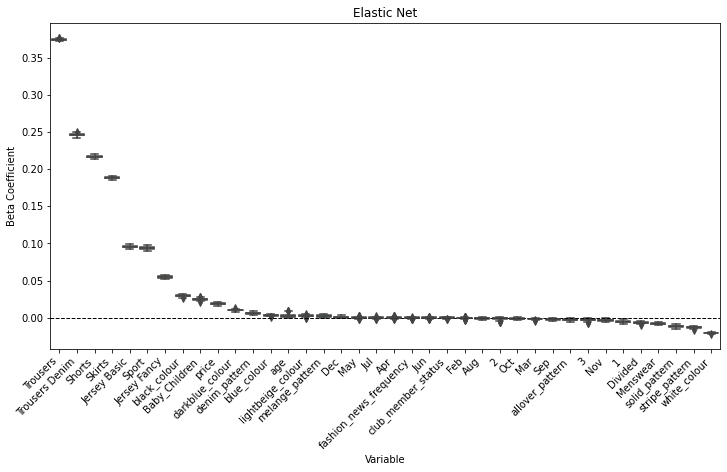

In [15]:
mean_by_coef = list(elastic_df.T.mean().sort_values(ascending=False).index)
plt.figure(figsize=(12, 6))
sns.boxplot(data=elastic_df.T, order=mean_by_coef)
plt.title('Elastic Net')
plt.xlabel('Variable')
plt.ylabel('Beta Coefficient')
plt.xticks(rotation=45, ha='right')
plt.axhline(0.0, ls='--', color='black', lw=1)
plt.show()

## Mallows CP

In [151]:
def mallows_cp(SSEp, MSEk, n, p):
    return (SSEp/MSEk) - n + (2*p)

In [152]:
PRODUCT_TYPE_NAME = 'Garment Lower body'

target_samples = df.loc[df['product_group_name']==PRODUCT_TYPE_NAME].sample(n=int(SAMPLE_SIZE/2)).reset_index(drop=True)
other_samples = df.loc[df['product_group_name']!=PRODUCT_TYPE_NAME].sample(n=len(target_samples)).reset_index(drop=True)

sample_df = pd.concat([target_samples, other_samples])
sample_df[PRODUCT_TYPE_NAME] = sample_df['product_group_name'].apply(lambda x: 1 if x==PRODUCT_TYPE_NAME else 0)

sample_df = sample_df.sample(frac=1).reset_index(drop=True)
sample_df.drop(columns=['product_group_name', 'customer_id'], inplace=True)
display(sample_df.head())
print(sample_df.shape)

price   age  solid_pattern  allover_pattern  denim_pattern  \
0  18.106780  30.0            0.0              0.0            1.0   
1   3.805932  23.0            1.0              0.0            0.0   
2   4.446610  34.0            0.0              1.0            0.0   
3  19.060169  61.0            0.0              0.0            0.0   
4   7.619492  28.0            1.0              0.0            0.0   

   melange_pattern  stripe_pattern  black_colour  white_colour  \
0              0.0             0.0           0.0           0.0   
1              0.0             0.0           0.0           1.0   
2              0.0             0.0           0.0           0.0   
3              0.0             1.0           0.0           0.0   
4              0.0             0.0           0.0           1.0   

   darkblue_colour  ...  club_member_status  fashion_news_frequency  Divided  \
0              0.0  ...                 1.0                     1.0      1.0   
1              0.0  ...                 1.0                     1.0      1.0   
2              0.0  ...                 1.0                     1.0      0.0   
3              0.0  ...                 1.0                     1.0      0.0   
4              0.0  ...                 1.0                     1.0      0.0   

   Menswear  Baby_Children  Sport    1    2    3  Garment Lower body  
0       0.0            0.0    0.0  0.0  0.0  0.0                   1  
1       0.0            0.0    0.0  1.0  0.0  0.0                   0  
2       0.0            0.0    0.0  0.0  0.0  0.0                   1  
3       1.0            0.0    0.0  0.0  1.0  0.0                   0  
4       0.0            0.0    0.0  1.0  0.0  0.0                   1  

[5 rows x 22 columns]

(100000, 22)


In [160]:
from sklearn.metrics import mean_squared_error
from itertools import combinations

X, y = sample_df.drop(columns=[PRODUCT_TYPE_NAME]), sample_df[PRODUCT_TYPE_NAME]
X = sm.add_constant(X)

FEATURES = ['const','price','age','denim_pattern','Divided', 'Sport', 'white_colour', 'melange_pattern']
MODELS = []
for _ in range(1, len(FEATURES)+1):
    for subset in combinations(FEATURES, _):
        MODELS.append(list(subset))


# master linear regression
master_model = sm.OLS(endog=y, exog=X).fit()
yHat = master_model.fittedvalues
MSE_k = mean_squared_error(y_true=y, y_pred=yHat)

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Variables', 'CP'])
results_dict = dict()
model_parameters = dict()

for sub_mod in tqdm(MODELS):
    X_sub = X[sub_mod]
    subset_model = sm.OLS(endog=y, exog=X_sub).fit()
    y_sub = subset_model.fittedvalues

    n = len(X_sub)
    p = len(sub_mod)
    SSE_p = np.sum(np.square(y-y_sub))

    cp_value = mallows_cp(SSE_p, MSE_k, n, p)
    results_dict[str(sub_mod)] = cp_value
    model_parameters[str(sub_mod)] = p

# Sort the results by CP values
results_df = pd.Series(results_dict)
model_N = pd.Series(model_parameters)

results_df = pd.concat([results_df, model_N], axis=1)
results_df.rename(columns={
    0: 'Mallows CP',
    1: 'P'
}, inplace=True)

# Print the results
print(results_df.head())

100%|██████████| 255/255 [00:03<00:00, 69.35it/s]

                     Mallows CP  P
['const']          23767.607038  1
['price']          42264.982015  1
['age']            36123.208397  1
['denim_pattern']  89522.128787  1
['Divided']        94296.785024  1


In [161]:
# Print the results
results_df.sort_values(by='Mallows CP')

Mallows CP  P
['const', 'price', 'age', 'denim_pattern', 'Div...    1837.033408  8
['const', 'price', 'denim_pattern', 'Divided', ...    1975.071106  7
['const', 'price', 'age', 'denim_pattern', 'Div...    2477.368394  7
['const', 'price', 'denim_pattern', 'Divided', ...    2600.929648  6
['const', 'age', 'denim_pattern', 'Divided', 'S...    2888.517621  7
...                                                           ... ..
['Sport', 'melange_pattern']                        135941.186135  2
['Sport']                                           137167.648945  1
['white_colour', 'melange_pattern']                 142328.574052  2
['white_colour']                                    144400.201601  1
['melange_pattern']                                 145434.194294  1

[255 rows x 2 columns]

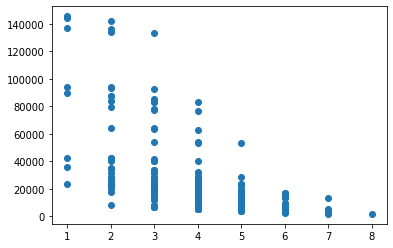

In [162]:
plt.scatter(results_df.P, results_df['Mallows CP'])

In [163]:
key_features = ['price', 'age', 'denim_pattern', 'Divided', 'Sport', 'white_colour', 'melange_pattern']

# define our sample targets for 50/50 split
target_samples = df.loc[df['product_group_name']==PRODUCT_GROUP_NAME].sample(n=int(SAMPLE_SIZE/2)).reset_index(drop=True)
other_samples = df.loc[df['product_group_name']!=PRODUCT_GROUP_NAME].sample(n=len(target_samples)).reset_index(drop=True)

# concat data
sample_df = pd.concat([target_samples, other_samples])
sample_df[PRODUCT_GROUP_NAME] = sample_df['product_group_name'].apply(lambda x: 1 if x==PRODUCT_GROUP_NAME else 0)
sample_df = sample_df.sample(frac=1).reset_index(drop=True)
sample_df.drop(columns=['product_group_name', 'customer_id'], inplace=True)

X, y = sample_df[key_features], sample_df[PRODUCT_GROUP_NAME]
X = sm.add_constant(X)

In [165]:
lr = sm.OLS(endog=y, exog=X).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Garment Lower body   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     2972.
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:48:25   Log-Likelihood:                -63127.
No. Observations:              100000   AIC:                         1.263e+05
Df Residuals:                   99992   BIC:                         1.263e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2977      0.005     60.624      0.000       0.288       0.307
price               0.0054      0.000     31.889      0.000       0.005       0.006
age                 0.0014      0.000     12.970      0.000       0.001       0.002
denim_pattern       0.4708      0.005    103.566      0.000       0.462       0.480
Divided             0.1264      0.003     37.627      0.000       0.120       0.133
Sport               0.2899      0.007     40.398      0.000       0.276       0.304
white_colour       -0.2076      0.005    -39.750      0.000      -0.218      -0.197
melange_pattern    -0.1607      0.007    -23.536      0.000      -0.174      -0.147
==============================================================================
Omnibus:                   568896.406   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10309.369
Skew:                           0.198   Prob(JB):                         0.00
Kurtosis:                       1.477   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
np.mean(y==np.round(lr.predict(X)))

0.65993

In [171]:
lr = sm.Logit(endog=y, exog=X).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.589858
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Garment Lower body   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99992
Method:                           MLE   Df Model:                            7
Date:                Wed, 22 Nov 2023   Pseudo R-squ.:                  0.1490
Time:                        15:52:01   Log-Likelihood:                -58986.
converged:                       True   LL-Null:                       -69315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9612      0.024    -39.871      0.000      -1.008      -0.914
price               0.0279      0.001     31.653      0.000       0.026       0.030
age                 0.0067      0.001     12.958      0.000       0.006       0.008
denim_pattern       3.3902      0.050     68.158      0.000       3.293       3.488
Divided             0.6292      0.016     38.264      0.000       0.597       0.661
Sport               1.2584      0.034     36.483      0.000       1.191       1.326
white_colour       -1.0286      0.028    -36.604      0.000      -1.084      -0.974
melange_pattern    -0.7151      0.033    -21.420      0.000      -0.781      -0.650
===================================================================================
"""